In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('/content/placement.csv')

In [48]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [49]:
df.shape

(100, 4)

In [50]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Train test split
# 3. Scale the values
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [51]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [52]:
# Preprocess + EDA + Feature Selection
df = df.iloc[:,1:]       # one column is not useful so remove that
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [53]:
# lets visualise our data -
import matplotlib.pyplot as plt

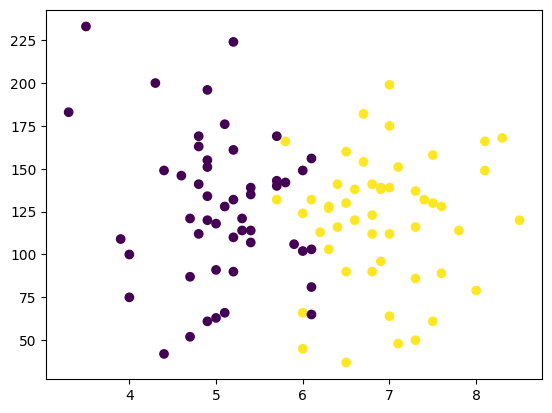

In [54]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [55]:
# from the graph we can see a linear boundary.. so we will use regression analysis

# 1. Extract input and output cols
X = df.iloc[:,0:2]     # extract input columns (cgpa,iq)
y = df.iloc[:,2]       # extract output column (placement)

In [78]:
# 2. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.1)

In [79]:
X_train

,cgpa,iq
89,4.9,151.0
74,6.7,154.0
1,5.9,106.0
30,7.6,128.0
64,7.0,64.0
...,...,...
46,5.3,114.0
48,6.6,138.0
28,5.2,90.0
41,5.4,114.0


In [80]:
y_train

,placement
89,0
74,1
1,0
30,1
64,1
...,...
46,0
48,1
28,0
41,0


In [81]:
X_test

,cgpa,iq
76,4.9,155.0
63,6.3,128.0
34,4.8,163.0
97,6.7,182.0
25,5.0,91.0
39,4.6,146.0
65,8.1,166.0
69,8.5,120.0
94,4.7,52.0
33,6.0,149.0


In [82]:
y_test

,placement
76,0
63,1
34,0
97,1
25,0
39,0
65,1
69,1
94,0
33,0


In [83]:
# 3. Scale the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.98572724,  0.72106893],
       [ 0.63546883,  0.79641282],
       [-0.08506276, -0.40908942],
       [ 1.44606687,  0.14343244],
       [ 0.90566818, -1.46390388],
       [-1.07579369,  0.46992263],
       [-2.24665752,  2.7804686 ],
       [ 0.90566818,  0.41969337],
       [ 0.09507014,  0.84664208],
       [ 1.62619976, -0.20817238],
       [ 0.81560173,  0.41969337],
       [ 0.45533593, -2.14199889],
       [ 0.09507014, -1.03695517],
       [ 0.54540238, -0.0574846 ],
       [-0.535395  , -0.38397479],
       [ 0.90566818, -0.25840164],
       [-0.80559435,  0.14343244],
       [ 1.17586752, -0.91138202],
       [ 0.99573463, -1.86573796],
       [-0.7155279 , -0.3086309 ],
       [ 0.00500369,  0.04297392],
       [-0.535395  ,  0.31923485],
       [-0.98572724, -1.53924777],
       [ 0.00500369, -1.94108185],
       [ 1.89639911,  0.67083967],
       [ 2.07653201,  1.14801765],
       [-2.42679042,  1.5247371 ],
       [ 0.72553528, -0.8109235 ],
       [-0.98572724,

In [85]:
X_test = scaler.transform(X_test)
X_test

array([[-0.98572724,  0.82152745],
       [ 0.27520304,  0.14343244],
       [-1.07579369,  1.02244449],
       [ 0.63546883,  1.49962247],
       [-0.89566079, -0.78580887],
       [-1.25592659,  0.59549578],
       [ 1.89639911,  1.09778839],
       [ 2.2566649 , -0.0574846 ],
       [-1.16586014, -1.76527944],
       [ 0.00500369,  0.67083967]])

In [86]:
# 4. Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [87]:
# model training
model.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [89]:
y_test

,placement
76,0
63,1
34,0
97,1
25,0
39,0
65,1
69,1
94,0
33,0


In [90]:
# check for accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

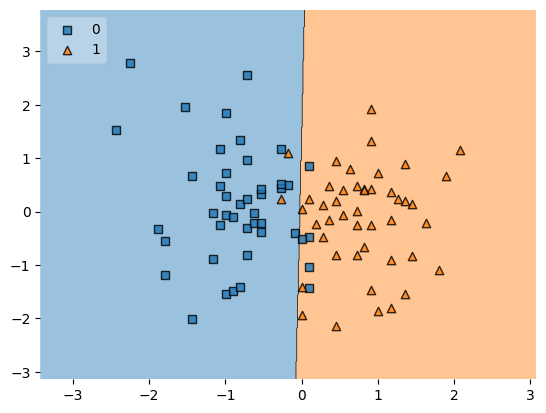

In [91]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [93]:
import pickle

In [94]:
pickle.dump(model,open('model.pkl','wb'))